In [181]:
# load libraries and scripts
include("../scripts/tools.jl")
include("../scripts/plotting.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")
include("../scripts/disturbances.jl")

local_disturbance (generic function with 1 method)

In [182]:
include("../scripts/get_grid.jl")
#load borders
border, scale_factor = import_border("../data/borders/border.json")

dx = 0.01
Nx, Ny, coord, isinside, isborder, isgrid, n = get_grid(border, dx)

(105, 79, [-0.404950144084045 -0.6233270799121987; -0.394950144084045 -0.6233270799121987; … ; 0.365049855915955 0.4166729200878013; 0.375049855915955 0.4166729200878013], Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [10.0 3.0 -1.0 -1.0; 11.0 3.0 0.0 -1.0; … ; 37.0 102.0 0.0 1.0; 38.0 102.0 1.0 1.0])

In [185]:
# compute or load grid parameters
include("../scripts/get_params.jl")
minv, gamma, p, xi, bx, by, m, d = get_params_diff_fast(isinside, isgrid, n, Ny, Nx, Float64(dx), coord, scale_factor, "../data/disc/pantagruel.h5",
    "../numerics/grid_params_" * string(dx) * ".h5", Niter=10, dmax = 0.01, patch=20.0, bmin=50.0, tau=0.00001);

  1.895881 seconds (1.29 M allocations: 4.562 GiB, 4.34% gc time, 10.35% compilation time)
  0.279455 seconds (3.73 k allocations: 257.525 MiB, 4.15% gc time)


In [187]:
#minimum(bx[isgrid])
#minimum(by[isgrid])
println(size(minv))
println(size(gamma))
println(size(xi))
println(size(p))
println(size(bx))
println(size(by))
println(size(m))
println(size(d))

(3854,)
(3854,)
(3854, 3854)
(3854,)
(8295,)
(8295,)
(8295,)
(8295,)


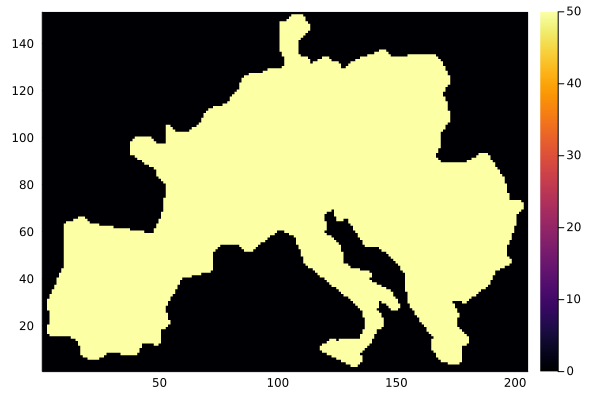

In [168]:
heatmap(reshape(by,Ny,Nx))

In [169]:
include("../scripts/stable.jl")
th = compute_stable_sol(isinside, n, bx, by, p, interval = 1000, Niter = 40000, tol = 1e-7)

[1000.0 0.0003883895236005408]
[2000.0 0.0001931324501016629]
[3000.0 0.00015003556596471235]
[4000.0 0.00012250548837228203]
[5000.0 0.00011965549247383578]
[6000.0 0.00011216770986133273]
[7000.0 0.00010279399834334235]
[8000.0 9.307415817016995e-5]
[9000.0 8.372296125080947e-5]
[10000.0 7.504227921684148e-5]
[11000.0 6.71322581049516e-5]
[12000.0 5.99969066892303e-5]
[13000.0 5.359650726188825e-5]
[14000.0 4.787352591595351e-5]
[15000.0 4.276530795666034e-5]
[16000.0 3.821015719385201e-5]
[17000.0 3.415009193408203e-5]
[18000.0 3.053193315993852e-5]
[19000.0 2.730756364588416e-5]
[20000.0 2.4433785941413433e-5]
[21000.0 2.1871998326483677e-5]
[22000.0 1.9587800802689515e-5]
[23000.0 1.755058775088081e-5]
[24000.0 1.5733155005692723e-5]
[25000.0 1.4111334059707659e-5]
[26000.0 1.266365814323045e-5]
[27000.0 1.137106098214602e-5]
[28000.0 1.0216606950663731e-5]
[29000.0 9.473521038305677e-6]
[30000.0 9.035139099777822e-6]
[31000.0 8.61825527065374e-6]
[32000.0 8.221455339074701e-6]
[3

31365-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

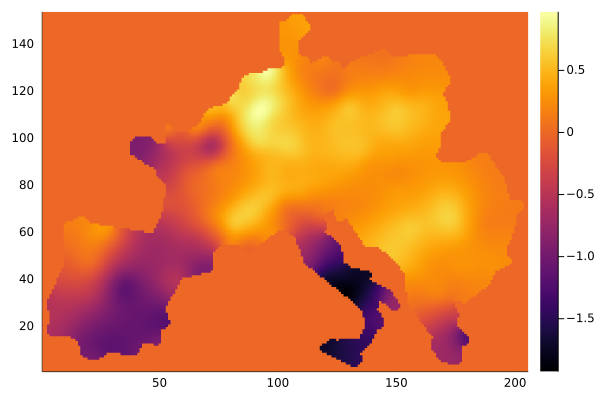

In [171]:
heatmap(reshape(th,Ny,Nx))

In [ ]:
ts, ~, omegas = perform_dyn_sim(isgrid, xi, p, minv, gamma, th interval = 100, Ndt = 1000, dt= 0.01, method = "crank-nicolson")